In [3]:
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
import tqdm
import os
import numpy as np

In [4]:
result_folder = '../results_speech'
param_dict = {'norm': ['minmax', 'zscore'],
                  'filter_outliers': [True, False],
                  'rms_th': [0, 0.25, 0.50, 0.75],
                  'alg': ['svm', 'rf'],
                  'win_min_max': [True, False]
                  }
param_list = sklearn.model_selection.ParameterGrid(param_dict)

col = ['name', 'norm', 'filter_outlier', 'rms_th', 'alg', 'win_min_max', 'cl_balanced_accuracy', 'cl_f1',  
       'mcl_balanced_accuracy', 'mcl_f1', 'r_R2', 'r_mae']

results = pd.DataFrame(columns=col)

for params in tqdm.tqdm(param_list):
    res_file_name = 'res_norm-{}_outliers-{}_rms-{}_alg-{}_win-{}.pkl'.format(params['norm'],
                                                                              params['filter_outliers'],
                                                                              str(params['rms_th']).replace('.', ''),
                                                                              params['alg'],
                                                                              params['win_min_max'])
    res_df = pd.read_pickle(os.path.join(result_folder, res_file_name))
    
    
    y_cl_true = np.array(res_df['y_value'], dtype=np.float) >= 0.5
    cl_balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_cl_true, res_df['y_pred_cl'])
    cl_f1_score = sklearn.metrics.f1_score(y_cl_true, res_df['y_pred_cl'])
    
    y_mcl_true = np.array(res_df['y_label'], dtype=np.float) - 1  # labels for classification
    mcl_balanced_accuracy = sklearn.metrics.accuracy_score(y_mcl_true, res_df['y_pred_mcl'])
    mcl_f1= sklearn.metrics.f1_score(y_mcl_true, res_df['y_pred_mcl'], average='micro')
    
    y_r_true = np.array(res_df['y_value'], dtype=np.float)  #  values for regression
    r_R2 = sklearn.metrics.r2_score(y_r_true, res_df['y_pred_r'])
    r_mae = sklearn.metrics.mean_absolute_error(y_r_true, res_df['y_pred_r'])
    
    newrow = pd.DataFrame( [[res_file_name, params['norm'], params['filter_outliers'], params['rms_th'], params['alg'], 
                            params['win_min_max'], cl_balanced_accuracy, cl_f1_score, mcl_balanced_accuracy, mcl_f1,
                            r_R2, r_mae]],
                    columns=col)
    results = results.append(newrow, ignore_index=True)
    




    
    
    



100%|██████████| 64/64 [00:26<00:00,  1.37it/s]


In [18]:
results.sort_values(by='cl_balanced_accuracy', ascending=False)[results['rms_th']==0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,norm,filter_outlier,rms_th,alg,win_min_max,cl_balanced_accuracy,cl_f1,mcl_balanced_accuracy,mcl_f1,r_R2,r_mae
8,res_norm-zscore_outliers-True_rms-0_alg-svm_wi...,zscore,True,0,svm,True,0.875434,0.838821,0.623556,0.623556,0.826835,0.101487
9,res_norm-zscore_outliers-True_rms-0_alg-svm_wi...,zscore,True,0,svm,False,0.875419,0.837849,0.623188,0.623188,0.837005,0.093135
40,res_norm-zscore_outliers-True_rms-0_alg-rf_win...,zscore,True,0,rf,True,0.843948,0.803878,0.601561,0.601561,0.747755,0.120859
32,res_norm-minmax_outliers-True_rms-0_alg-rf_win...,minmax,True,0,rf,True,0.843351,0.803008,0.604621,0.604621,0.748174,0.120806
41,res_norm-zscore_outliers-True_rms-0_alg-rf_win...,zscore,True,0,rf,False,0.839780,0.797737,0.597487,0.597487,0.760720,0.111673
33,res_norm-minmax_outliers-True_rms-0_alg-rf_win...,minmax,True,0,rf,False,0.839310,0.797060,0.596997,0.596997,0.760222,0.111848
25,res_norm-zscore_outliers-False_rms-0_alg-svm_w...,zscore,False,0,svm,False,0.834825,0.793596,0.587936,0.587936,0.769182,0.112059
24,res_norm-zscore_outliers-False_rms-0_alg-svm_w...,zscore,False,0,svm,True,0.825715,0.782749,0.588924,0.588924,0.750655,0.123311
49,res_norm-minmax_outliers-False_rms-0_alg-rf_wi...,minmax,False,0,rf,False,0.809406,0.761131,0.583283,0.583283,0.641561,0.141229
57,res_norm-zscore_outliers-False_rms-0_alg-rf_wi...,zscore,False,0,rf,False,0.809193,0.760824,0.581771,0.581771,0.642467,0.141032


In [32]:
results.loc[(results['norm']=='minmax') & (results['win_min_max']==True)]

,name,norm,filter_outlier,rms_th,alg,win_min_max,cl_balanced_accuracy,cl_f1,mcl_balanced_accuracy,mcl_f1,r_R2,r_mae
0,res_norm-minmax_outliers-True_rms-0_alg-svm_wi...,minmax,True,0,svm,True,0.781872,0.718329,0.474358,0.474358,0.585718,0.156492
2,res_norm-minmax_outliers-True_rms-025_alg-svm_...,minmax,True,0.25,svm,True,0.728325,0.642389,0.445666,0.445666,0.513063,0.168797
4,res_norm-minmax_outliers-True_rms-05_alg-svm_w...,minmax,True,0.5,svm,True,0.663844,0.535231,0.412940,0.412940,0.398615,0.186564
6,res_norm-minmax_outliers-True_rms-075_alg-svm_...,minmax,True,0.75,svm,True,0.569781,0.296423,0.368994,0.368994,0.303936,0.202534
16,res_norm-minmax_outliers-False_rms-0_alg-svm_w...,minmax,False,0,svm,True,0.724021,0.643750,0.452469,0.452469,0.436586,0.195124
18,res_norm-minmax_outliers-False_rms-025_alg-svm...,minmax,False,0.25,svm,True,0.687290,0.587946,0.431500,0.431500,0.376302,0.204962
20,res_norm-minmax_outliers-False_rms-05_alg-svm_...,minmax,False,0.5,svm,True,0.638315,0.495197,0.412105,0.412105,0.285751,0.219195
22,res_norm-minmax_outliers-False_rms-075_alg-svm...,minmax,False,0.75,svm,True,0.579280,0.339824,0.400203,0.400203,0.217176,0.231906
32,res_norm-minmax_outliers-True_rms-0_alg-rf_win...,minmax,True,0,rf,True,0.843351,0.803008,0.604621,0.604621,0.748174,0.120806
34,res_norm-minmax_outliers-True_rms-025_alg-rf_w...,minmax,True,0.25,rf,True,0.835364,0.792290,0.603778,0.603778,0.707682,0.128775


In [51]:
wmm_list = [True]
alg_list = ['svm', 'rf']
fo_list = [True]
rms_list = [0]

for alg in alg_list:
    for wmm in wmm_list:
        for fo in fo_list:
            for rms in rms_list:
                print('alg:{} - wmm:{} - fo:{} - rms:{}'.format(alg, wmm, fo, rms))
                print(results.loc[(results['filter_outlier']==fo) &
                            (results['rms_th']==rms) &
                            (results['win_min_max']==wmm) &
                            (results['alg']==alg)][['norm', 'cl_balanced_accuracy', 'cl_f1', 'r_R2']])
                print()
                print()

alg:svm - wmm:True - fo:True - rms:0
     norm  cl_balanced_accuracy     cl_f1      r_R2
0  minmax              0.781872  0.718329  0.585718
8  zscore              0.875434  0.838821  0.826835


alg:rf - wmm:True - fo:True - rms:0
      norm  cl_balanced_accuracy     cl_f1      r_R2
32  minmax              0.843351  0.803008  0.748174
40  zscore              0.843948  0.803878  0.747755




In [57]:
import matplotlib.pyplot as plt

In [53]:
norm = 'zscore'
rms_th = 0
win_min_max = True
alg = 'svm'
filter_outliers = True

In [54]:
result_folder = '../results_speech'

res_file_name = 'res_norm-{}_outliers-{}_rms-{}_alg-{}_win-{}.pkl'.format(norm,
                                                                      filter_outliers,
                                                                      str(rms_th).replace('.', ''),
                                                                      alg,
                                                                      win_min_max)
res_df = pd.read_pickle(os.path.join(result_folder, res_file_name))
    

In [55]:
res_df

,path,noise,snr,y_value,y_label,n_win,rms_idx,y_pred_cl,y_pred_mcl,y_pred_r
0,/nas/home/cborrelli/speech_forensics/dataset/d...,crowd,2,0.000000,1,98,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.071729
1,/nas/home/cborrelli/speech_forensics/dataset/t...,car,7,0.400000,3,132,"[True, True, True, True, True, True, True, Tru...",False,2.0,0.435037
2,/nas/home/cborrelli/speech_forensics/dataset/t...,car,0,0.272727,2,90,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.228189
3,/nas/home/cborrelli/speech_forensics/dataset/d...,restaurant,5,0.153846,1,193,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.223401
4,/nas/home/cborrelli/speech_forensics/dataset/t...,restaurant,2,0.266667,2,230,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.227575
5,/nas/home/cborrelli/speech_forensics/dataset/t...,car,12,0.375000,2,141,"[True, True, True, True, True, True, True, Tru...",True,4.0,0.747925
6,/nas/home/cborrelli/speech_forensics/dataset/t...,crowd,0,0.000000,1,157,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.167132
7,/nas/home/cborrelli/speech_forensics/dataset/t...,speech3,12,0.583333,3,159,"[True, True, True, True, True, True, True, Tru...",True,2.0,0.649609
8,/nas/home/cborrelli/speech_forensics/dataset/t...,speech2,2,0.115385,1,198,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.138288
9,/nas/home/cborrelli/speech_forensics/dataset/t...,hall,2,0.000000,1,201,"[True, True, True, True, True, True, True, Tru...",False,0.0,0.061839


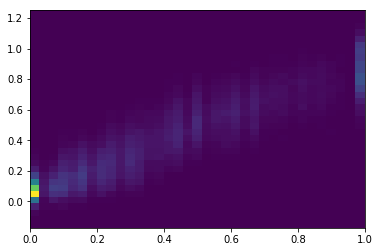

<Figure size 432x432 with 0 Axes>

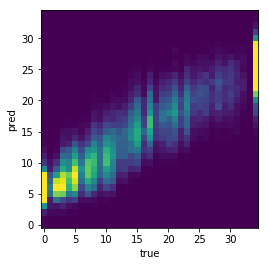

In [96]:
a = plt.hist2d(res_df['y_value'], res_df['y_pred_r'], bins=[35, 35]);

plt.figure(figsize=(6, 6))
plt.figure()
plt.imshow(a[0].T, clim=[0, 350], origin='lower')
plt.xlabel('True values')
plt.ylabel('pred')
plt.show()

In [180]:
y_r_true = np.array(res_df['y_value'], dtype=np.float)  #  values for regression
r_R2 = sklearn.metrics.r2_score(y_r_true, res_df['y_pred_r'])
r_mae = sklearn.metrics.mean_absolute_error(y_r_true, res_df['y_pred_r'])

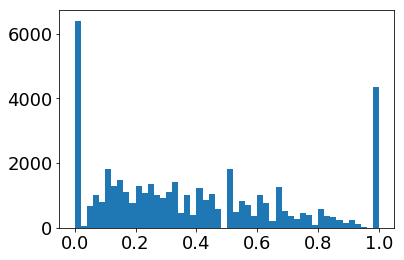

In [182]:
plt.hist(y_r_true, 50);

In [114]:
snr_list = [0, 2, 5, 7, 10, 12, 15]
data = [res_df['y_pred_r'].loc[np.where(res_df['snr'] == snr)] for snr in snr_list]
data = [res_df['y_pred_r'][np.where(np.logical_and(res_df['y_value']>=y_min, res_df['y_value']<=y_max))[0]] for y_min, y_max in
       zip(np.arange(0, 1, .1), np.arange(0, 1, .1) + .1)]

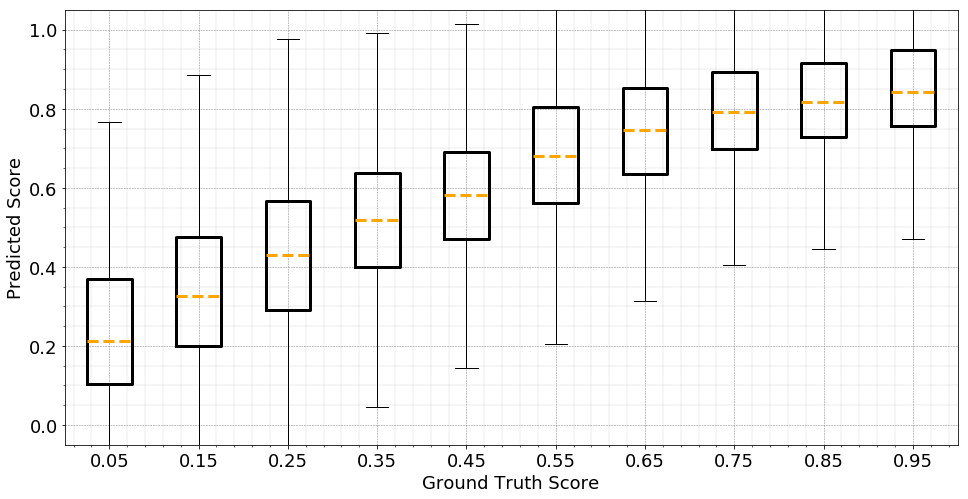

In [184]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
my_snr_list = [0, 2.5, 5, 7.5, 10, 12.5, 15]

plt.xlabel('Ground Truth Score',)
plt.ylabel('Predicted Score')
ax.minorticks_on()

ax.grid(which='both')
ax.grid(which='major', linestyle='dashed', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle='dashed', linewidth='0.2', color='gray')
boxprops = dict(linestyle='solid', linewidth=3, color='black')
medianprops = dict(linestyle='dashed', linewidth=3, color='orange')
box = plt.boxplot(data, medianprops=medianprops, boxprops=boxprops, showfliers=False)
plt.xticks(np.arange(10)+1, ['{:.2f}'.format(x) for x in np.arange(0, 1.1, .1) + .05])
plt.yticks(np.arange(0, 1.2, .2))
plt.ylim([-0.05, 1.05])
plt.savefig('boxplot_pred.pdf', bbox_inches='tight')
custom_lines = [box['medians'][0], box['boxes'][0], box['caps'][0]]
#plt.legend(custom_lines, ['Median', 'caps', 'whis'])
plt.savefig('boxplot_pred.pdf', bbox_inches='tight')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x123badcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1224466a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12792dc18>,
 'medians': [<matplotlib.lines.Line2D at 0x122446d30>,
 'fliers': [],
 'means': []}